### Logistic Regression
Baseline model to get a sense of what kind of accuracy we get initially.

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
train = pd.read_csv("../03-data-creation/train_processed_2.csv", low_memory = False)
test = pd.read_csv("../03-data-creation/test_processed_2.csv", low_memory = False)

display(train.head())
display(test.head())

,Unnamed: 0,id,v1,v2,v3,v4,v6,v7,v8,v9,...,v251,v253,v254,v255,v256,v257,v258,v263,cntry,satisfied
0,0,9948,2,2,74,11010,2,2,2,2,...,40,2,2,1,2,2,1941,-1,0,0
1,1,25601,4,2,58,11010,2,2,2,2,...,39,2,2,2,2,2,1957,-1,0,0
2,2,8592,6,2,47,11010,2,2,1,2,...,35,4,2,1,2,2,1968,1963,0,1
3,3,29593,10,2,22,11010,2,2,2,2,...,50,3,2,1,2,2,1993,-1,0,0
4,4,4252,0,1,24,11010,2,2,2,2,...,38,1,2,1,2,2,1991,-1,0,1


,Unnamed: 0,id,v1,v2,v3,v4,v6,v7,v8,v9,...,v250,v251,v253,v254,v255,v256,v257,v258,v263,cntry
0,0,14061,0,1,63,15020,2,2,1,2,...,40,48,1,2,1,2,2,1952,-1,0
1,1,16467,5,2,44,21070,1,2,2,1,...,40,45,2,2,1,2,2,1971,-1,0
2,2,25725,10,2,21,11010,2,1,2,2,...,38,38,4,2,2,1,1,1994,-1,0
3,3,9100,2,2,75,11010,2,2,2,2,...,40,40,1,2,1,2,2,1940,1946,0
4,4,32597,0,1,22,11010,2,2,2,2,...,40,40,2,2,1,2,2,1993,-1,0


In [3]:
train['satisfied'].value_counts()

1    15626
0    14454
Name: satisfied, dtype: int64

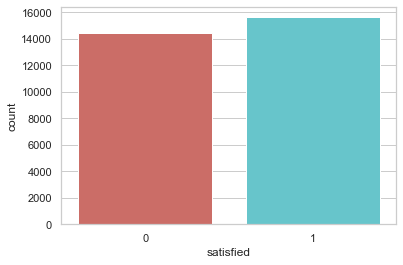

In [4]:
sns.countplot(x='satisfied', data=train, palette='hls')
plt.show()

In [5]:
print("percentage of not satisfied is", (len(train[train['satisfied']==0]) / train.shape[0])*100)
print("percentage of satisfied is", (len(train[train['satisfied']==1]) / train.shape[0])*100)

percentage of not satisfied is 48.05186170212766
percentage of satisfied is 51.94813829787234


In [6]:
X_cols = train.columns[2:-1].to_numpy()
X = train.loc[:, X_cols]
y = train.loc[:, train.columns == 'satisfied']

display(X)
display(y)

,v1,v2,v3,v4,v6,v7,v8,v9,v10,v12,...,v250,v251,v253,v254,v255,v256,v257,v258,v263,cntry
0,2,2,74,11010,2,2,2,2,1,2,...,40,40,2,2,1,2,2,1941,-1,0
1,4,2,58,11010,2,2,2,2,1,2,...,39,39,2,2,2,2,2,1957,-1,0
2,6,2,47,11010,2,2,1,2,1,1,...,30,35,4,2,1,2,2,1968,1963,0
3,10,2,22,11010,2,2,2,2,1,2,...,40,50,3,2,1,2,2,1993,-1,0
4,0,1,24,11010,2,2,2,2,1,2,...,38,38,1,2,1,2,2,1991,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30075,0,1,72,14120,2,2,2,2,1,2,...,40,60,2,2,-1,-1,2,1942,1945,20
30076,0,1,38,14120,2,2,2,2,1,2,...,40,40,4,2,1,-1,2,1976,-1,20
30077,5,2,49,14120,2,2,2,2,1,1,...,40,48,3,2,1,-1,2,1965,1967,20
30078,0,1,16,14120,2,2,2,2,1,2,...,-1,-1,3,-1,-1,-1,2,1998,1972,20


,satisfied
0,0
1,0
2,1
3,0
4,1
...,...
30075,1
30076,1
30077,0
30078,1


In [8]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.444202
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.358     
Dependent Variable: satisfied        AIC:              27123.2173
Date:               2020-03-03 19:58 BIC:              28785.5405
No. Observations:   30080            Log-Likelihood:   -13362.   
Df Model:           199              LL-Null:          -20827.   
Df Residuals:       29880            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
v1       -0.0165     0.0081    -2.0459   0.0408   -0.0323   -0.0007
v2       -0.0904     0.0212    -4.2714   0.0000   -0.1319 

In [9]:
full_log_model = LogisticRegression()
full_log_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X_test = test.loc[:, X_cols]
y_pred_full_log_model = full_log_model.predict(X_test)
test_ids = test['id']
test_pred_full_log_model = pd.DataFrame({'id': test_ids, 'Predicted':y_pred_full_log_model})
test_pred_full_log_model

,id,Predicted
0,14061,0
1,16467,0
2,25725,1
3,9100,1
4,32597,0
...,...,...
9240,31430,1
9241,3876,0
9242,20710,1
9243,26015,1


In [12]:
test_pred_full_log_model.to_csv("test_pred_full_log_model.csv", index=False)

With the initial logistic regression model that used all features (200 columns) we have a score of

### Recursive Feature Elimination

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.



In [26]:
# Find optimum number of features, for which the accuracy is the highest from RFE
high_score = 0

# Variable to store the optimum features
nof = 1
score_list = []

for n in range(1,len(X_cols)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = n
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 107
Score with 107 features: 0.798648


In [27]:
logreg = LogisticRegression()
rfe = RFE(logreg, nof)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False  True  True  True  True False False
  True  True False  True False False  True  True False  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
 False False  True False False False False False False False False False
 False  True False False  True False False  True False  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True False False False False False  True  True  True
 False False  True False  True  True False False False False  True  True
  True False False False False False False False  True False  True False
  True  True False False False  True False False False  True False False
 False False False False  True  True  True  True False False  True  True
  True  True  True  True False  True  True False  True  True  True  True
 False  True  True  True  True False  True  True Fa

In [28]:
temp = pd.Series(rfe.support_, index = X_cols)
selected_features_rfe = temp[temp==True].index
selected_features_rfe

Index(['v2', 'v6', 'v8', 'v9', 'v10', 'v12', 'v15', 'v16', 'v18', 'v21',
       ...
       'v240', 'v242', 'v244', 'v245', 'v246', 'v247', 'v248', 'v253', 'v255',
       'v257'],
      dtype='object', length=107)

In [29]:
X_reduced = X[selected_features_rfe]
reduced_log_model = LogisticRegression()
reduced_log_model.fit(X_reduced,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
X_test_reduced = test.loc[:, selected_features_rfe]
y_pred_reduced_log_model = reduced_log_model.predict(X_test_reduced)
test_pred_reduced_log_model = pd.DataFrame({'id': test_ids, 'Predicted':y_pred_reduced_log_model})
test_pred_reduced_log_model

,id,Predicted
0,14061,0
1,16467,0
2,25725,1
3,9100,1
4,32597,0
...,...,...
9240,31430,1
9241,3876,0
9242,20710,1
9243,26015,1


In [31]:
test_pred_reduced_log_model.to_csv("test_pred_reduced_log_model.csv", index=False)